![CharlieBlackmonHR](http://www.denverpost.com/wp-content/uploads/2017/04/denverpost-com-671311704.jpg?w=525 "Charlie Blackmon home run")

### What features do we want?

In [1]:
cd ..

/Users/johnphillips/Desktop/DSI-Class-Stuff/BaseBall


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
# Start with reading the data from the pickle
teams = pd.read_pickle('data/teams.p')

In [5]:
# Separate the Numeric Columns:

teams_num = teams.select_dtypes(exclude=['object', 'category'])
teams_num.columns

Index([u'yearID', u'G', u'Ghome', u'W', u'L', u'LgWin', u'WSWin', u'R', u'AB',
       u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP', u'SF',
       u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA', u'HRA',
       u'BBA', u'SOA', u'E', u'DP', u'FP', u'attendance', u'BPF', u'PPF',
       u'BA', u'OBP', u'SLG', u'OPS', u'WinP'],
      dtype='object')

### Separate X and y 

In [6]:
# Had to also drop Wins, Losses, and WinP since those are direct indicators.
# And they are not part of a players individual stats.
X = teams_num.drop(['WSWin', 'LgWin', 'W', 'L', 'WinP'], axis=1) 

# Make a y2 based upon Winning Leage Series, for possible second model.
y = teams_num['WSWin']
y2 = teams_num['LgWin'] 

In [7]:
# Train-test split our data...

# Standard split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.5)

# Second split based upon LgWin target:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state = 42, test_size=0.5)

### Recursive Feature Elimination with Logistic Regression to find some features

In [8]:
rfe = RFE(LogisticRegression(C=0.1, random_state=42), n_features_to_select=5, step=1, verbose=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Second Setup with League Champ as target.
rfe2 = RFE(LogisticRegression(C=0.1, random_state=42), n_features_to_select=5, step=1, verbose=0, )
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [10]:
rfe.fit(X_train_scaled, y_train)
rfe2.fit(X2_train_scaled, y2_train)

RFE(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [11]:
# Print the feature columns...
rfe_feats = np.where(rfe.get_support())[0]
print("The WS features are :", rfe_feats)

rfe2_feats = np.where(rfe2.get_support())[0]
print("The LS features are :", rfe2_feats)

('The WS features are :', array([ 3, 15, 17, 19, 35]))
('The LS features are :', array([ 3, 15, 17, 31, 35]))


In [12]:
print("The RFE score is : {:.2f}".format(rfe.score(X_train_scaled, y_train)))
print("The RFE score is : {:.2f}".format(rfe2.score(X2_train_scaled, y2_train)))

The RFE score is : 0.95
The RFE score is : 0.92


In [13]:
X.columns[3], X.columns[15], X.columns[17], X.columns[19], X.columns[35]

('R', 'RA', 'ERA', 'SHO', 'OPS')

In [14]:
X.columns[3], X.columns[15], X.columns[17], X.columns[31], X.columns[35]

('R', 'RA', 'ERA', 'PPF', 'OPS')

### Different Features:
Interesting that the features are slightly different for the two different targets.

For the World Series Win target, the top features are:
* R: Runs; 
* RA: Opponents Runs Scored; 
* ERA: Earned Run Average; 
* SHO: Shutouts; 
* OPS: On base Plus Slugging percentage.

For the League Champion Win target, the top features are:
* R: Runs; 
* RA: Opponents Runs Scored; 
* ERA: Earned Run Average; 
* PPF: 3 year park factor for pitchers;
* OPS: On base Plus Slugging percentage.

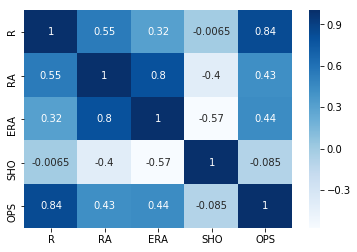

In [15]:
# Show correlation of each feature from WSWin target.
ws_cols = teams_num[['R', 'RA', 'ERA', 'SHO', 'OPS']]

# Heatmap it!
sns.heatmap(ws_cols.corr(), annot=True, cmap='Blues')

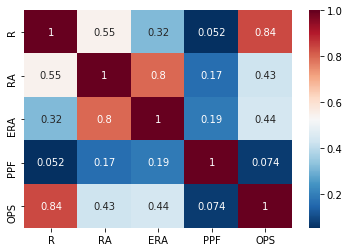

In [16]:
# Show correlation of each feature from LgWin target
ls_cols = teams_num[['R', 'RA', 'ERA', 'PPF', 'OPS']]

# Heatmap it!
sns.heatmap(ls_cols.corr(), annot=True, cmap='RdBu_r')

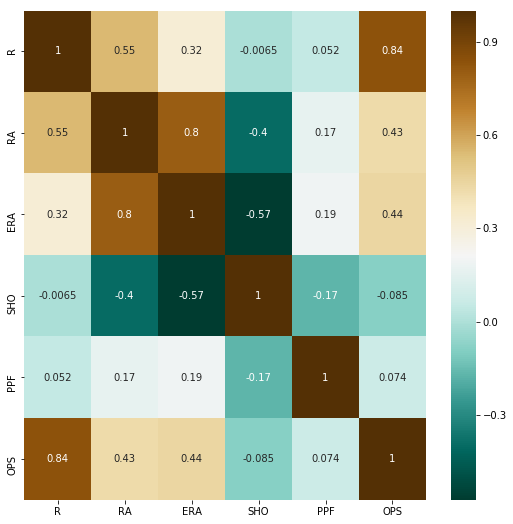

In [17]:
# Let's put all 6 features in one Heatmap:

# Show correlation of each feature from WSWin target.
six_cols = teams_num[['R', 'RA', 'ERA', 'SHO', 'PPF', 'OPS']]

# Heatmap it!
fig = plt.figure(figsize=(9,9))
sns.heatmap(six_cols.corr(), annot=True, cmap='BrBG_r')
# Changed cmap to "diverging" class, so we want to look for darker correlations

### Look at PCA to reduce to important features

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [19]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

#X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(reduced.shape)))

Original shape: (2835, 36)
Reduced shape: (2835, 2)


Text(0,0.5,u'Principal components')

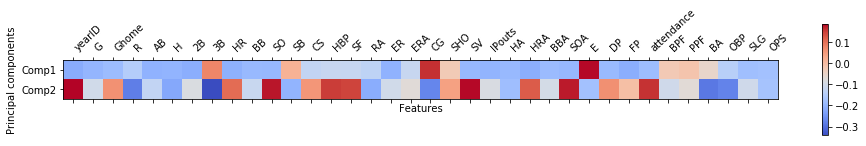

In [20]:
# Use plt.matshow to display colorful matrix of pca.components_

plt.matshow(pca.components_, cmap='coolwarm')
plt.yticks([0, 1,], ['Comp1', 'Comp2'] )
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=43, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal components")

### Check scores:

In [21]:
# Recall:
# y = teams_num['WSWin'].values

In [22]:
# Linear Regression on First Component:

#pca_linreg = LinearRegression()
pca_logreg = LogisticRegression()
pca_scores = cross_val_score(pca_logreg, reduced[:,0:1], y, cv=10)
print pca_scores
print np.mean(pca_scores)

[0.95774648 0.95774648 0.95774648 0.95774648 0.95774648 0.95774648
 0.95774648 0.96113074 0.96099291 0.96099291]
0.9587341909764984


In [23]:
# Linear Regression on First 3 Principle Components:

#pca_linreg = LinearRegression()
pca_logreg = LogisticRegression()
pca_scores = cross_val_score(pca_logreg, reduced[:,0:3], y, cv=10)
print pca_scores
print np.mean(pca_scores)

[0.95774648 0.95774648 0.95774648 0.95774648 0.95774648 0.95774648
 0.95774648 0.96113074 0.96099291 0.96099291]
0.9587341909764984


Scores should be close...

In [24]:
# Decomposition

from sklearn import decomposition
PCA = decomposition.PCA(n_components=2)
PCA.fit(X)
PCA_X = PCA.transform(X)
PCA.components_  # resulting eigenvectors

array([[ 3.54678983e-05,  1.06464155e-05,  1.44787611e-05,
         4.72866132e-05,  3.54660857e-04,  9.62647382e-05,
         3.61792566e-05, -1.16322776e-05,  4.83569581e-05,
         6.39620424e-05,  2.46509896e-04, -7.99585725e-06,
         1.12601530e-05,  1.27573181e-05,  1.01668511e-05,
         2.15558059e-05,  6.83065385e-05,  1.87337141e-07,
        -2.93315568e-05,  6.36353394e-07,  1.35301693e-05,
         2.99385919e-04,  7.59929120e-05,  4.31047835e-05,
         5.08797598e-05,  2.41886606e-04, -7.27686346e-05,
         2.68726380e-05,  1.71256441e-08,  9.99999811e-01,
         1.95086065e-07, -1.49225552e-07,  9.71594006e-10,
         7.04822656e-09,  2.46337680e-08,  3.16819946e-08],
       [-1.16973120e-02, -2.20889635e-02, -1.65783299e-02,
        -7.28399699e-02, -7.14309570e-01, -1.89490875e-01,
        -3.23474652e-02, -6.45217878e-03, -1.56003181e-02,
        -9.13025492e-02, -1.00541954e-01, -1.66528297e-02,
        -7.82208675e-03,  5.65628803e-04,  4.51757944e-

In [25]:
PCA.mean_

array([1.95568183e+03, 1.50469841e+02, 6.74486772e+01, 6.82399295e+02,
       5.14647337e+03, 1.34693933e+03, 2.28127690e+02, 4.69135802e+01,
       1.02045150e+02, 4.73959083e+02, 7.12654321e+02, 1.06275838e+02,
       3.38271605e+01, 1.00800705e+01, 7.99259259e+00, 6.82399295e+02,
       5.71952381e+02, 3.81887831e+00, 4.99760141e+01, 9.65925926e+00,
       2.38673721e+01, 4.02564515e+03, 1.34675168e+03, 1.02045150e+02,
       4.74316755e+02, 7.37241623e+02, 1.85365432e+02, 1.24556614e+02,
       9.65447266e-01, 1.22361029e+06, 1.00197531e+02, 1.00223280e+02,
       2.61383305e-01, 3.22820532e-01, 3.80982593e-01, 7.03803126e-01])

In [26]:
np.dot(X_train - pca.mean_, pca.components_.T)[:10]

array([[-545287.68626425,  483604.15001192],
       [  -3141.02060125,   -1533.18906472],
       [ -44535.05264924,   35577.4393979 ],
       [ -24988.4058063 ,   17146.00175441],
       [ -60425.17853894,   48998.88686113],
       [-113812.68078949,   96982.71041603],
       [ -73968.78017723,   61518.54266107],
       [-114914.13048519,   97895.68514586],
       [-140593.28616615,  121189.2358723 ],
       [-488562.57142958,  432867.60304576]])

In [27]:
def model_it(X_train, X_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    GNB = GaussianNB()
    GNB.fit(X_train,y_train)
    print(GNB.score(X_test,y_test))

    # Native Bayes classifier, function to do it

In [28]:
model_it(X_train, X_test, y_train, y_test)

0.7411847672778561


In [29]:
# Instantiate our Principal Componenter
pca = decomposition.PCA(n_components=2) # 2 components.
pca.fit(X_train) # fitting out PC using the train data
PCA_X_train = pca.transform(X_train) #transforming x_train
PCA_X_test = pca.transform(X_test)   #transforming x_test

In [30]:
model_it(PCA_X_train, PCA_X_test, y_train, y_test)

0.9668547249647391


In [31]:
PCA_1 = [x[0] for x in PCA_X]
PCA_2 = [x[1] for x in PCA_X]


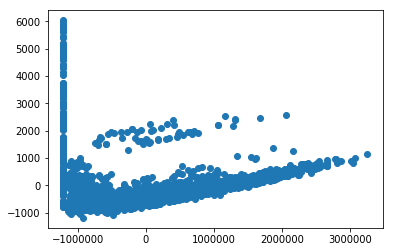

In [32]:
plt.scatter(PCA_1, PCA_2)
plt.show()  # resulting eigenvectors

In [33]:
new_reduced = pd.DataFrame(reduced)

In [34]:
# Pickle when ready
teams_num.to_pickle('data/teams_num.p')
new_reduced.to_pickle('data/new_reduced.p')

### More PCA

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

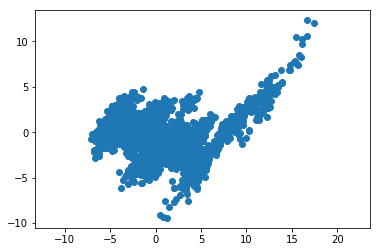

-2.786686280159131e-16


In [36]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to : pca_features
pca_features = model.fit_transform(X_scaled)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### Find Intrisic Dimension:

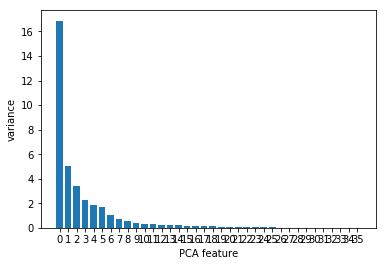

In [37]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Can we cluster teams?

In [43]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=15)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=2)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit the pipeline to articles
pipeline.fit(X_scaled)

# Calculate the cluster labels: labels
labels = pipeline.predict(X_scaled)
team_name = teams['name']
year_ID = teams['yearID']

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'team': team_name, 'year': year_ID})

# Display df sorted by cluster label
print(df.sort_values('year'))

      label                           team  year
0         0           Boston Red Stockings  1871
1         0        Chicago White Stockings  1871
2         0         Cleveland Forest Citys  1871
3         0           Fort Wayne Kekiongas  1871
4         0               New York Mutuals  1871
5         0         Philadelphia Athletics  1871
6         0          Rockford Forest Citys  1871
7         0                 Troy Haymakers  1871
8         0            Washington Olympics  1871
19        0           Washington Nationals  1872
18        0            Washington Olympics  1872
17        0                 Troy Haymakers  1872
16        0         Philadelphia Athletics  1872
15        0               New York Mutuals  1872
11        0             Brooklyn Atlantics  1872
13        0         Cleveland Forest Citys  1872
12        0           Boston Red Stockings  1872
10        0              Brooklyn Eckfords  1872
9         0             Baltimore Canaries  1872
14        0         